#Name: Patewar Ganesh Arjun

## Project Name: EDA on Retail(Superstore) database.

retail_660_110219015900-sixteen_nine.avif

##Importing all necessary libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Uploading Data.

In [70]:
df=pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/Python All/csv/SampleSuperstore.csv')

#First look of dataframe

In [71]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [72]:
#Shape of the dataframe
df.shape

(9994, 13)

###Managing the duplicate values:

In [73]:
# total number of duplicate values
df.duplicated().sum()

17

In [74]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

In [75]:
# rechecking the duplicates after dropping
df.duplicated().sum()

0

Now there is no any duplicate in the dataframe. 

## Data Info.

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


##Data Describe.

In [77]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


##Checking Null Values.

In [78]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No any null value present in the dataframe.

#Data wrangling, Data visualization and Storytelling:

##1. Segmentwise Count of transaction

In [79]:
c=df.groupby('Segment',as_index=False)['Sales'].count()
c

,Segment,Sales
0,Consumer,5183
1,Corporate,3015
2,Home Office,1779


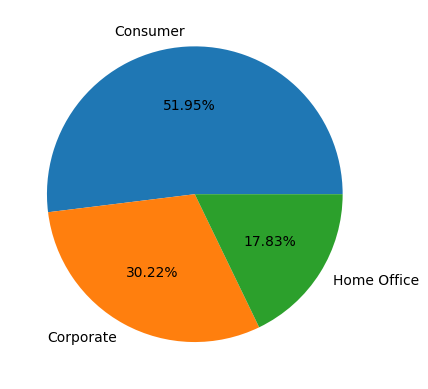

In [80]:
plt.pie(c['Sales'],labels=c['Segment'],autopct='%0.2f%%')

plt.show()

From this pie chart we can see that in given database 51.94% transactions are of Consumer segment while Corporate is 30.22% and Home Office is least with 17.84%

##2.Segmentwise Sale.

In [81]:
a=df.groupby('Segment',as_index=False).agg({'Sales':'sum'})
a

,Segment,Sales
0,Consumer,1.160833e+06
1,Corporate,7.060701e+05
2,Home Office,4.292927e+05


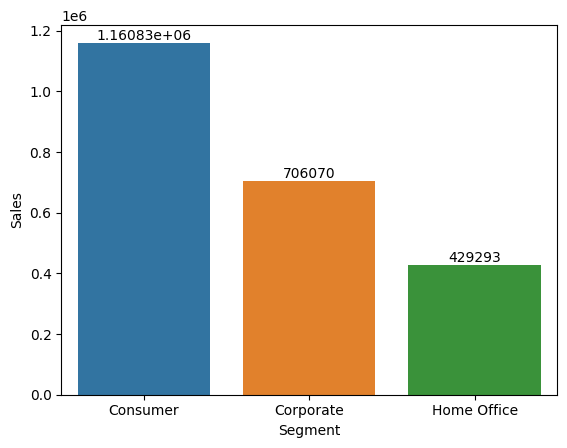

In [82]:
ax=sns.barplot(x=a['Segment'],y=a['Sales'])

for i in ax.containers:
  ax.bar_label(i)


From above graph we can see that in Consumer segment there is maximum sale of 1161400, followed by Corporate Segment and Home Office segment with 706146 and 429653 respectively.

##3.Segmentwise Profit.

In [83]:
b=df.groupby('Segment',as_index=False)['Profit'].sum()
b

,Segment,Profit
0,Consumer,134007.4413
1,Corporate,91954.9798
2,Home Office,60279.0015


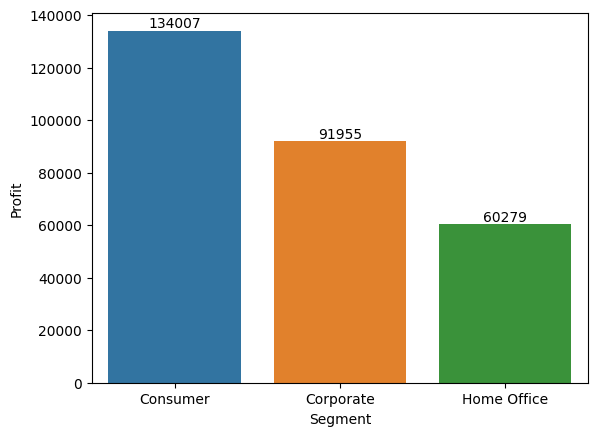

In [84]:
bx=sns.barplot(x=b['Segment'],y=b['Profit'])

for i in bx.containers:
  bx.bar_label(i)

From above Barplot we can conclude that most profitable segment is Consumer with 134119. Corporate segment is at 2nd with 91979.1 and Home Office is least with 60298.7

##4.Regionwise Transactions.

In [85]:
d=df.groupby('Region',as_index=False)['Sales'].count()
d

,Region,Sales
0,Central,2319
1,East,2845
2,South,1620
3,West,3193


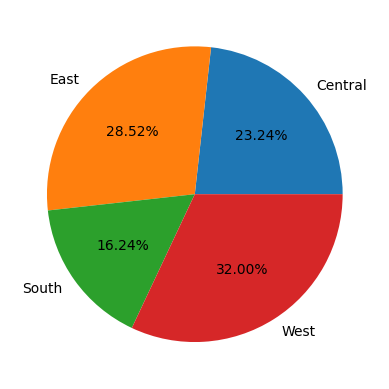

In [86]:
plt.pie(d['Sales'],labels=d['Region'],autopct='%0.2f%%')

plt.show()

Alone West region contribute 32.05% transactions. RRegion East is at second with 28.50%, Central with 23.24% at third and fourth is South with 16.21%.

##5. Regionwise Sale.

In [87]:
e=df.groupby('Region',as_index=False)['Sales'].sum()
e

,Region,Sales
0,Central,500782.8528
1,East,678435.1960
2,South,391721.9050
3,West,725255.6365


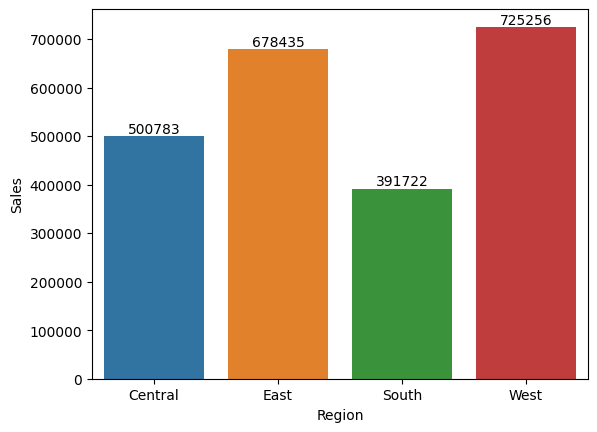

In [88]:
ex=sns.barplot(x=e['Region'],y=e['Sales'])

for i in ex.containers:
  ex.bar_label(i)


The maximum sale is in West region of 725458, followed by East region with 678781, Central region at 3rd with 501240 and south is at 4th with 391722.

##6.Profit by Region

In [89]:
f=df.groupby('Region',as_index=False)['Profit'].sum()
f

,Region,Profit
0,Central,39655.8752
1,East,91506.3092
2,South,46749.4303
3,West,108329.8079


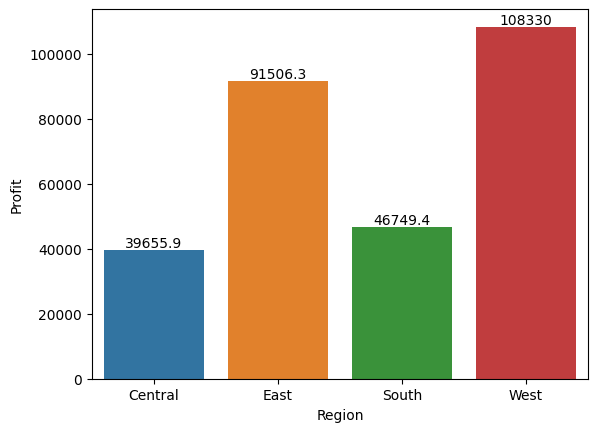

In [90]:
fx= sns.barplot(x=f['Region'],y=f['Profit'])

for i in fx.containers:
  fx.bar_label(i)

West region is most profitable with profit of 108418, East is 2nd with 91522.8 ,South is at 3rd with 46749.4 and Central is least profitable with profit of 39706.4 only.


By analyzing the current and previous graphs, it becomes apparent that the West region is leading in both sales and profits. The East region ranks second in both categories, while the Central region occupies the third position in sales but the fourth position in profits. On the other hand, the South region is ranked fourth in sales, but it occupies the third position in terms of profits.

##7.Top 10 states with maximum sale.

In [91]:
f=df.groupby('State',as_index=False)['Sales'].sum()
f=f.sort_values('Sales',ascending=False)
f=f.head(10)

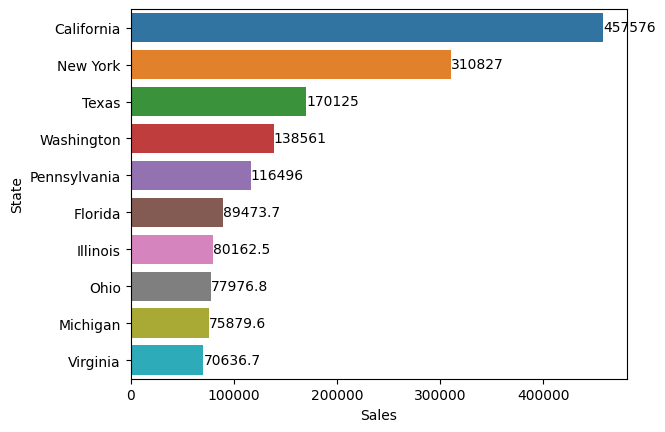

In [92]:
#plt.figure(figsize=(5,15))
fx=sns.barplot(y=f['State'],x=f['Sales'],orient='h')

for i in fx.containers:
  fx.bar_label(i)

'California' has the maximum sale followed by 'New York','Texas'.

## 8.Top 10 Profitable States.

In [93]:
g=df.groupby('State',as_index=False)['Profit'].sum()
g=g.sort_values('Profit',ascending=False)
g=g.head(10)
g

,State,Profit
3,California,76330.7891
30,New York,74015.4622
45,Washington,33368.2375
20,Michigan,24428.0903
44,Virginia,18597.9504
12,Indiana,18382.9363
9,Georgia,16250.0433
15,Kentucky,11199.6966
21,Minnesota,10823.1874
6,Delaware,9977.3748


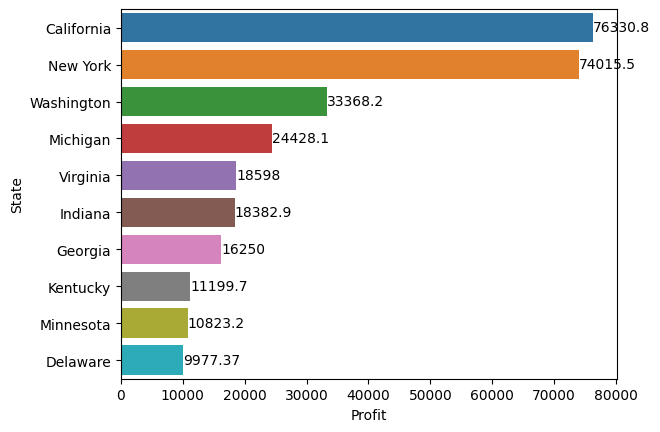

In [94]:
gx=sns.barplot(y=g['State'],x=g['Profit'])

for i in gx.containers:
  gx.bar_label(i)

State with maximum profit is 'California' and followed by 'New York','Washington'.

By referring to charts 6 and 7, we can deduce that the states of 'California', 'New York', and 'Texas' occupy the top 3 positions in terms of sales. However, when it comes to profits, the top 3 states are 'California', 'New York', and 'Washington', indicating that although 'Texas' ranks third in sales, it does not occupy the same position in terms of profits.

##9.Top 10 loss-making state.

In [95]:
l=df.groupby('State',as_index=False)['Profit'].sum()
l=l.sort_values('Profit',ascending=True)
l=l.head(10)
l

,State,Profit
41,Texas,-25750.9833
33,Ohio,-16959.3178
36,Pennsylvania,-15565.4035
11,Illinois,-12601.6500
31,North Carolina,-7490.9122
4,Colorado,-6527.8579
40,Tennessee,-5341.6936
1,Arizona,-3427.9246
8,Florida,-3399.3017
35,Oregon,-1194.0993


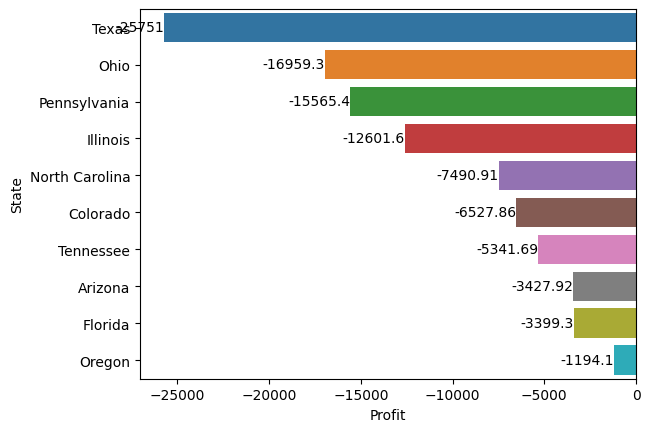

In [96]:
lx=sns.barplot(y=l['State'],x=l['Profit'])

for i in lx.containers:
  lx.bar_label(i)

'Texas' is most loss-making state.

'Texas' is 3rd in sale but top in loss-making state.

## 10.Relation between Region, Ship Mode and Sale.

In [97]:
g=df.groupby(['Region','Ship Mode'],as_index=False)['Sales'].sum()
g

,Region,Ship Mode,Sales
0,Central,First Class,58698.9634
1,Central,Same Day,20415.4100
2,Central,Second Class,103546.4414
3,Central,Standard Class,318122.0380
4,East,First Class,113587.0530
5,East,Same Day,43326.8320
6,East,Second Class,116545.5240
7,East,Standard Class,404975.7870
8,South,First Class,49332.5660
9,South,Same Day,21017.1730


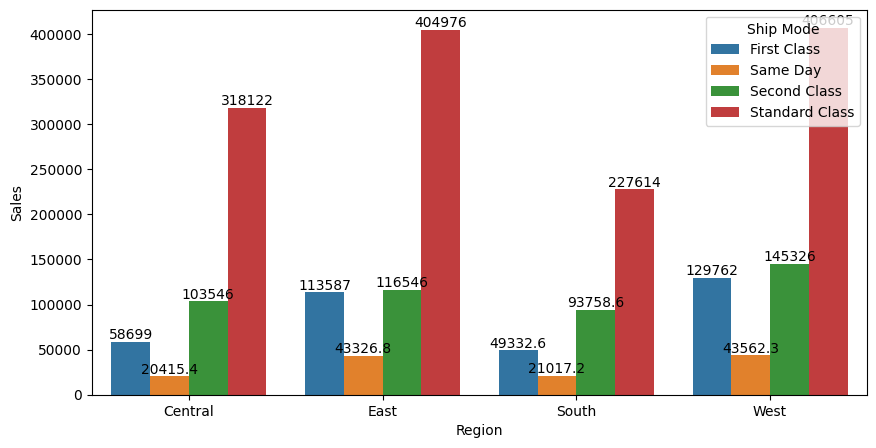

In [98]:
plt.figure(figsize=(10,5))
gx=sns.barplot(x=g['Region'],y=g['Sales'],hue=g['Ship Mode'])

for i in gx.containers:
  gx.bar_label(i)

Based on the above plot, it is evident that the 'Standard Class' ship mode contributes the most to sales in every region, while the 'Same Day' ship mode has the least impact on sales in each region.

Furthermore, the common trend of the ship modes across all regions is as follows:

1. Standard Class
2. Second Class
3. First Class
4. Same Day

# 11. Product Categorywise Sale.

In [99]:
i=df.groupby('Category',as_index=False)['Sales'].count()
i

,Category,Sales
0,Furniture,2118
1,Office Supplies,6012
2,Technology,1847


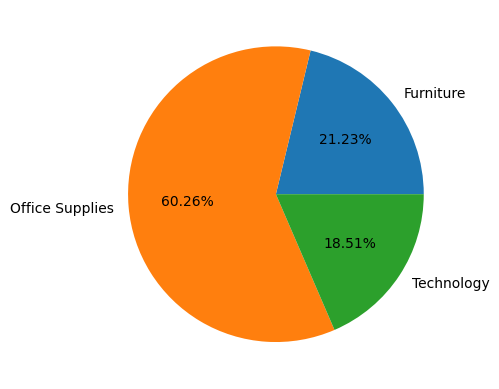

In [100]:
plt.pie(i['Sales'],labels=i['Category'],autopct='%0.2f%%')

plt.show()

The 'Office Supplies' category makes up 60.30% of the total sales, which is the highest among all categories. 'Furniture' accounts for 21.22% of the sales, while 'Technology' accounts for 18.48%.

##12. Correlation between Product Category, Ship Mode, and **Sales**

In [101]:
 h=df.groupby(['Category','Ship Mode'],as_index=False)['Sales'].count()
 h

,Category,Ship Mode,Sales
0,Furniture,First Class,327
1,Furniture,Same Day,119
2,Furniture,Second Class,427
3,Furniture,Standard Class,1245
4,Office Supplies,First Class,909
5,Office Supplies,Same Day,325
6,Office Supplies,Second Class,1150
7,Office Supplies,Standard Class,3628
8,Technology,First Class,301
9,Technology,Same Day,98


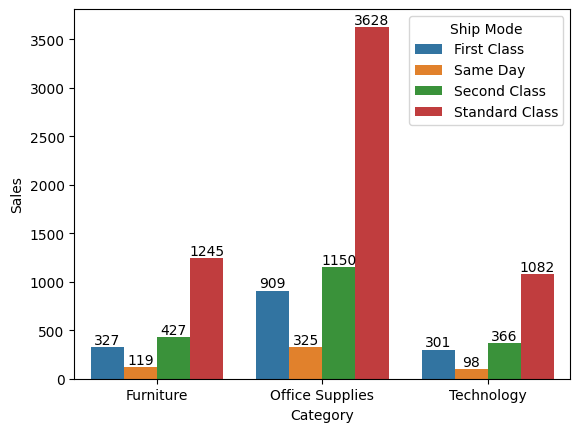

In [102]:
hx=sns.barplot(x=h['Category'],y=h['Sales'],hue=h['Ship Mode'])

for i in hx.containers:
  hx.bar_label(i)

'Standard Class' ship mode contribute to sale

#13.Relation between Category, Sub-Category and Profit.

In [103]:
i=df.groupby('Sub-Category',as_index=False)['Profit'].sum()
i=i.sort_values(by=['Profit'])
i

,Sub-Category,Profit
16,Tables,-17725.4811
4,Bookcases,-3472.5560
15,Supplies,-1189.0995
8,Fasteners,949.5182
11,Machines,3384.7569
10,Labels,5526.3820
2,Art,6524.6118
7,Envelopes,6964.1767
9,Furnishings,13052.7230
1,Appliances,18138.0054


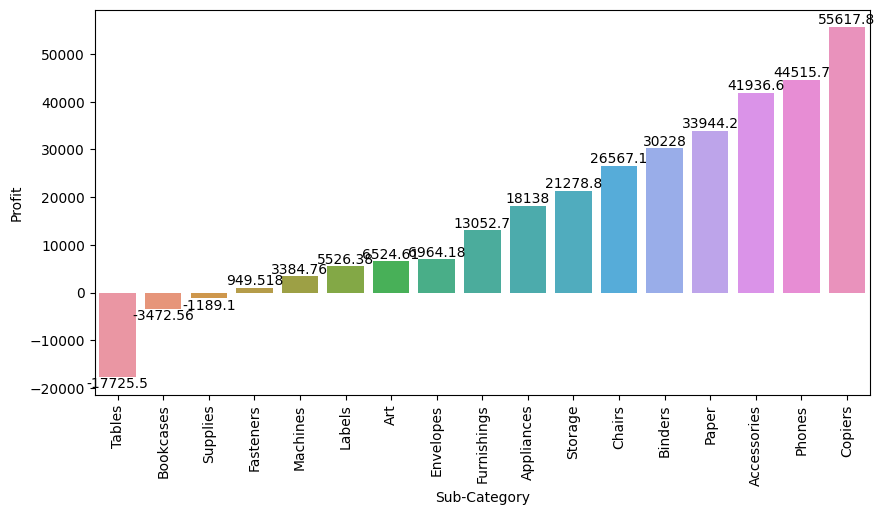

In [104]:
plt.figure(figsize=(10,5))
ix=sns.barplot(x=i['Sub-Category'],y=i['Profit'])

plt.xticks(rotation=90)
for i in ix.containers:
  ix.bar_label(i)

Most profitable Sub-Categories are:

1.Copiers

2.Phones

3.Accessories


Most unprofitable Sub-Categories are:

1.Table

2.Bookcases

3.Supplies

#14.Relation between Region, Category and Sales.

In [105]:
j=df.groupby(['Region','Category'],as_index=False)['Sales'].count()
j

,Region,Category,Sales
0,Central,Furniture,480
1,Central,Office Supplies,1419
2,Central,Technology,420
3,East,Furniture,600
4,East,Office Supplies,1710
5,East,Technology,535
6,South,Furniture,332
7,South,Office Supplies,995
8,South,Technology,293
9,West,Furniture,706


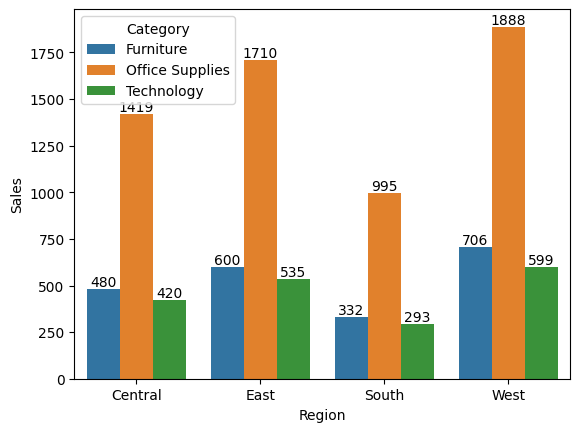

In [106]:
jx=sns.barplot(x=j['Region'],y=j['Sales'],hue=j['Category'])

for i in jx.containers:
  jx.bar_label(i)

Office supplies are the most demanding category in every region. Followed by Furniture and Technology.

#15.Corelation among the various parameters in dataframe.

In [107]:
df.corr()

<ipython-input-107-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


<ipython-input-108-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

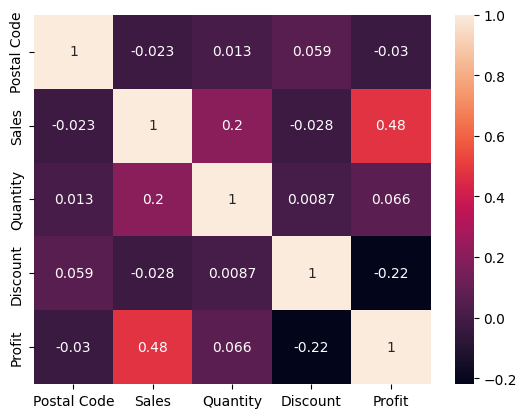

In [108]:
sns.heatmap(df.corr(),annot=True)

This heatmap indicates that there is a correlation of approximately 0.5 between sales and discounts, which means that when discounts are offered more frequently, sales tend to increase.

#15.Pairplot:

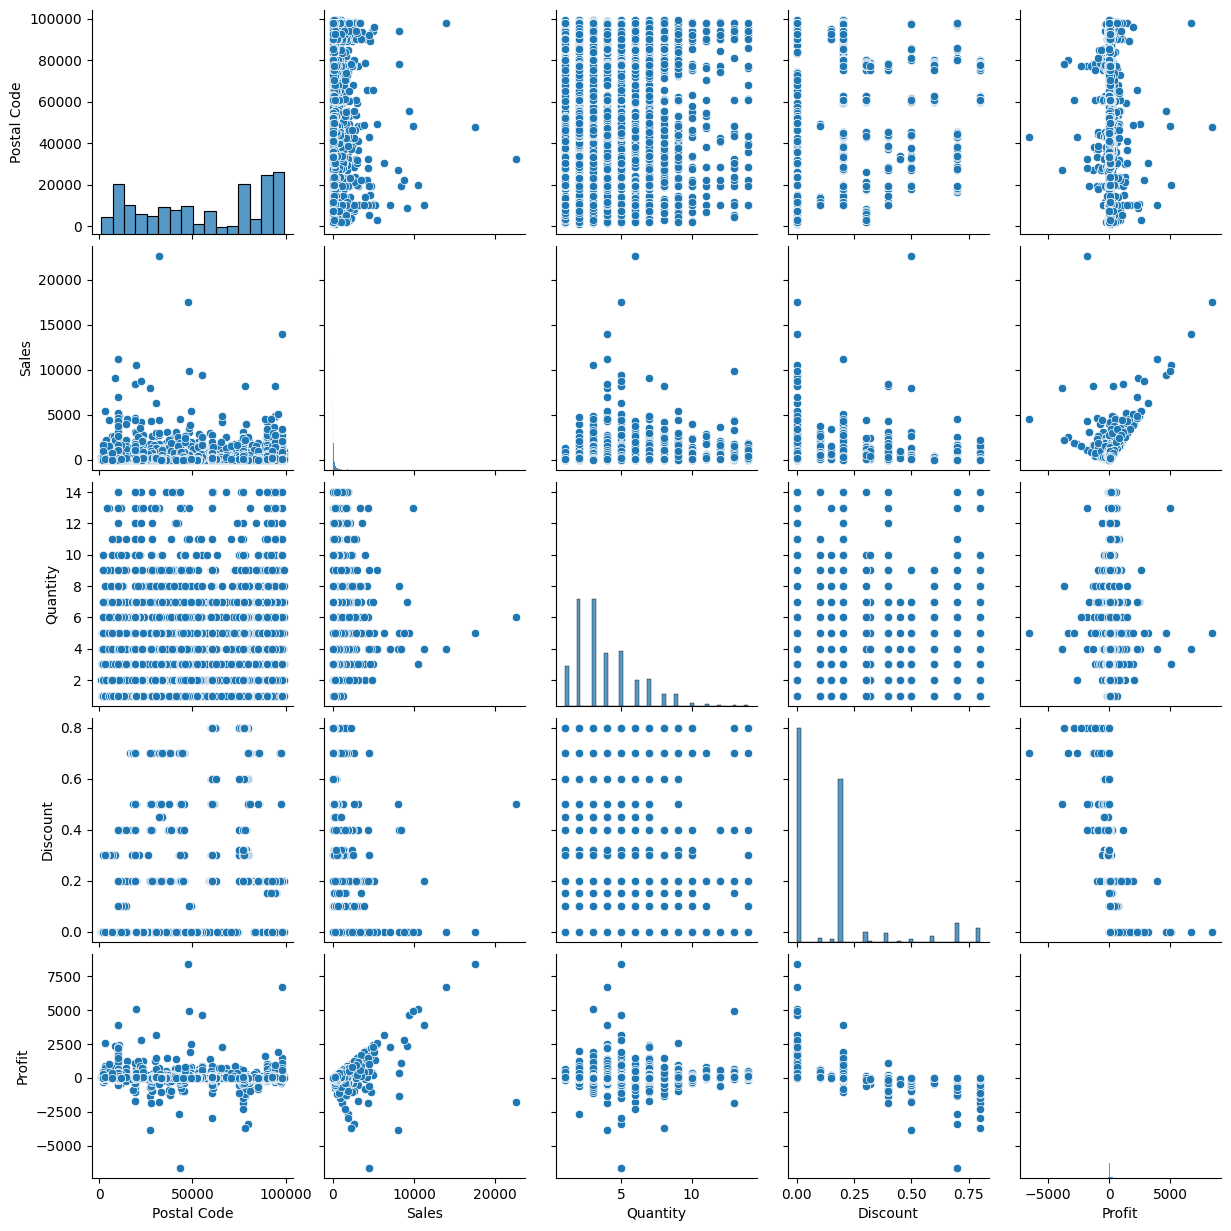

In [109]:
sns.pairplot(df)

#Conclusions:

In summary, the analysis of the various graphs and charts has yielded the following conclusions:

1. Consumer segment accounts for the majority of transactions at 51.94%, followed by Corporate at 30.22%, and Home Office at 17.84%.
2. Consumer segment has the highest sales at 1161400, followed by Corporate and Home Office with 706146 and 429653 respectively.
3. The most profitable segment is Consumer with a profit of 134119, followed by Corporate and Home Office with 91979.1 and 60298.7 respectively.
4. West region has the highest number of transactions at 32.05%, followed by East at 28.50%, Central at 23.24%, and South at 16.21%.
5. The West region has the highest sales at 725458, followed by East, Central, and South regions.
6. The West region is the most profitable with a profit of 108418, followed by East, South, and Central regions.
7. California has the highest sales, followed by New York and Texas.
8. California is the most profitable state, followed by New York and Washington.
9. Texas is the least profitable state, despite being third in sales.
10. The 'Standard Class' ship mode contributes the most to sales in every region, while the 'Same Day' ship mode has the least impact on sales.
11. The 'Office Supplies' category accounts for 60.30% of total sales, followed by Furniture and Technology.
12. 'Standard Class' ship mode contributes significantly to sales.
13. The most profitable sub-categories are Copiers, Phones, and Accessories, while the least profitable are Tables, Bookcases, and Supplies.
14. Office supplies are the most popular category in every region, followed by Furniture and Technology.
15. There is a positive correlation of approximately 0.5 between sales and discounts, indicating that more frequent discounts can increase sales.